In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline

In [12]:
def func(x_input):
        
    funct = np.matrix(np.sqrt(1-x_input**2)).T
        
    return funct

In [13]:
def chebapprox(N):
    
    theta = np.linspace(0, np.pi, N)

    G = np.zeros((N, N))

    interpolation_points = func(np.cos(theta))


    for i in range(N):

        for j in range(N):

            G[i, j] = np.cos(i*theta[j])

    G = np.asmatrix(G)
    G_inv = np.linalg.inv(G)


    spectral_coeff = G_inv*interpolation_points

    
    return spectral_coeff
 


        
        
        

In [14]:
def chebshev(N, x):

    order = N
    
    length = len(x)
    
    T_matrix = np.zeros((N, length))

    for i in range(order):
    
        if i == 0:

            T_matrix[0, :] = 1

        elif i ==1:

            T_matrix[i, :] = x

        else:

            T_matrix[i, :] = 2* x * T_matrix[i-1, :] - T_matrix[i-2, :]
            
    return T_matrix



In [15]:
N = 15
spectral_coefficients = chebapprox(N)

x_cheby = np.linspace(-1, 1, 1000)
x_obs = np.linspace(-1, 1, N)

chebys = chebshev(N, x_cheby)
interpolated_function = chebys.T*spectral_coefficients

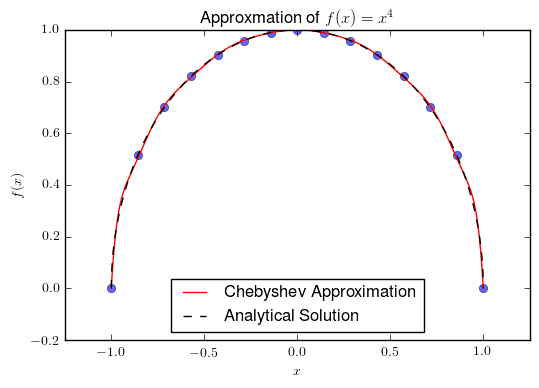

In [16]:
plt.plot(x_obs, func(x_obs), 'o', alpha = 0.6)
plt.plot(x_cheby, interpolated_function, 'r-', label = 'Chebyshev Approximation')
plt.plot(x_cheby, func(x_cheby), 'k--', label = 'Analytical Solution')



plt.xlim([-1.25, 1.25])

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title(r'Approxmation of $f(x)=x^{4}$')
plt.legend(loc = 0)
plt.show()
